In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

## Descriptive analysis: a) Referee Analysis
### 1. Top 10 referees by number of matches

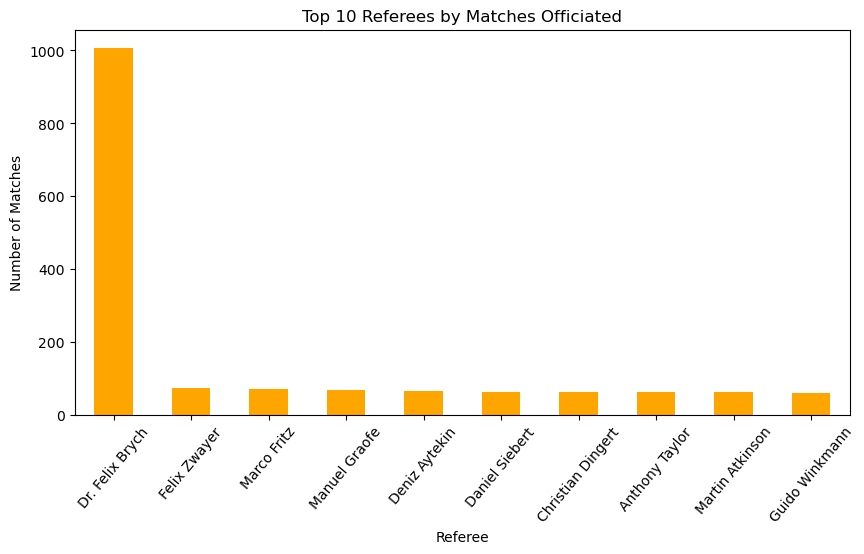

In [9]:
# 1. Top 10 referees by number of matches
top_referees = df['referee'].value_counts().head(10)
top_referees.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Referees by Matches Officiated')
plt.ylabel('Number of Matches')
plt.xlabel('Referee')
plt.xticks(rotation=50)
plt.show()

#### Dr. Felix Brych has officiated the most matches among the top 10 referees.
#### Felix Zwayer and Marco Fritz have officiated the second and third highest number of matches, respectively.
#### The remaining referees, including Manuel Graefe, Deniz Aytekin, Daniel Siebert, Christian Dingert, Anthony Taylor, Martin Atkinson, and Guido Winkmann, have officiated fewer matches compared to the top three.

### 2. Top referees by yellow and red car

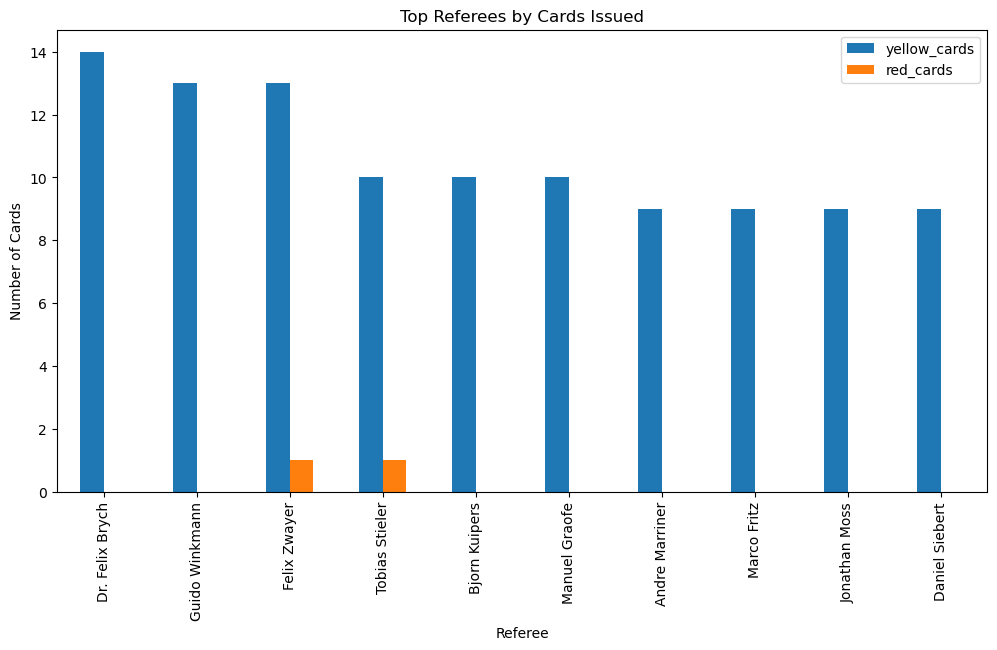

In [6]:
card_data = df.groupby('referee')[['yellow_cards', 'red_cards']].sum().sort_values('yellow_cards', ascending=False).head(10)
card_data.plot(kind='bar', figsize=(12, 6))
plt.title('Top Referees by Cards Issued')
plt.ylabel('Number of Cards')
plt.xlabel('Referee')
plt.show()

#### Dr. Felix Brych has issued the highest number of yellow cards.
#### Guido Winkmann and Felix Zwayer have also issued a significant number of yellow cards.
#### Tobias Stieler and Bjorn Kuipers have issued a small number of red cards.
#### Most other referees have issued a relatively low number of both yellow and red cards.

### 3. Average cards issued per match by referee

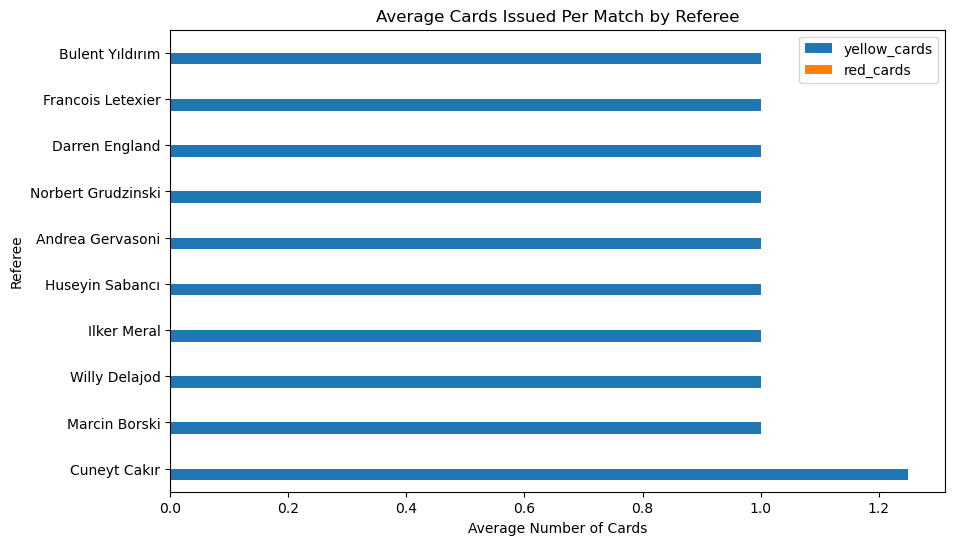

In [7]:
referee_card_avg = df.groupby('referee')[['yellow_cards', 'red_cards']].mean().sort_values('yellow_cards', ascending=False).head(10)
referee_card_avg.plot(kind='barh', figsize=(10, 6))
plt.title('Average Cards Issued Per Match by Referee')
plt.xlabel('Average Number of Cards')
plt.ylabel('Referee')
plt.show()

#### Cuneyt Cakir has the highest average number of cards issued per match, with a significant portion coming from yellow cards.
#### Other referees like Bulent Yildirim, Francois Letexier, and Darren England also have relatively high average card counts.
#### Some referees, like Norbert Grudzinski and Andrea Gervasoni, have lower average card counts.

## Descriptive analysis: b) Substitution Patterns

### 1. Substitution timings

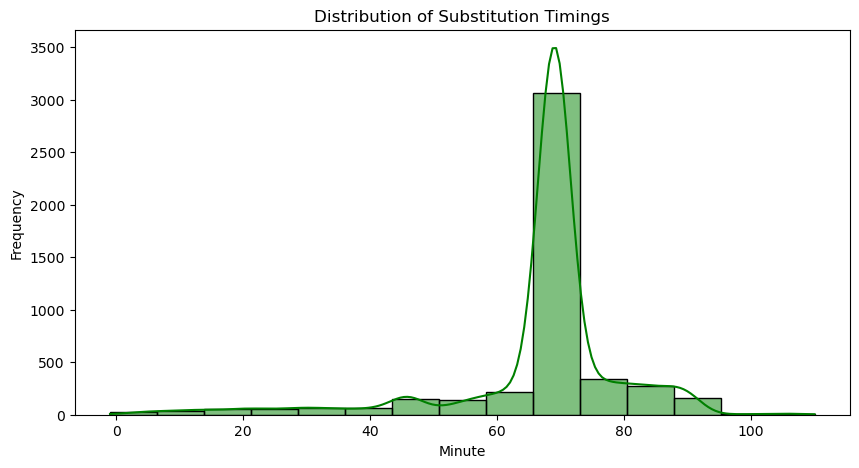

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['minute'], bins=15, kde=True, color='green')
plt.title('Distribution of Substitution Timings')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.show()

#### The chart illustrates that substitutions are most frequent around the 60-minute mark of the game. This could be due to various factors such as:

#### Player Fatigue: As the game progresses, players can experience fatigue, and managers may opt to make substitutions to bring on fresh legs.
#### Tactical Adjustments: Managers might make tactical changes to counter the opponent's strategy or to exploit weaknesses as the game unfolds.
#### Injury Management: Substitutions can be made to replace injured players or to prevent further injuries.


### 2. Most substituted players

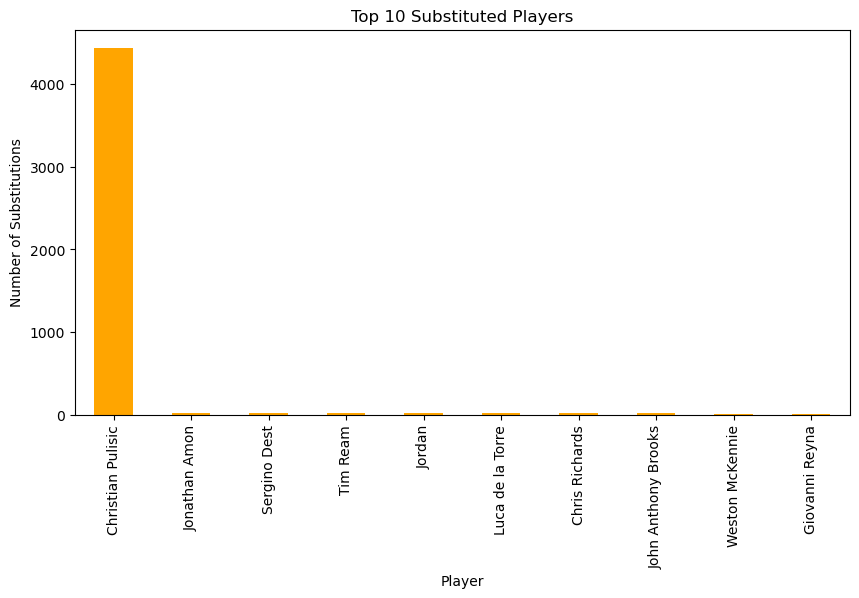

In [10]:
substituted_players = df['player_name_y'].value_counts().head(10)
substituted_players.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Substituted Players')
plt.ylabel('Number of Substitutions')
plt.xlabel('Player')
plt.show()

#### Christian Pulisic has been substituted the most among the top 10 players, with a significantly higher number of substitutions compared to the others.
#### The remaining players, including Jonathan Amon, Sergino Dest, Tim Ream, Jordan, Luca de la Torre, Chris Richards, John Anthony Brooks, Weston McKennie, and Giovanni Reyna, have been substituted a considerably lower number of times.

### 3. Teams with the most substitutions

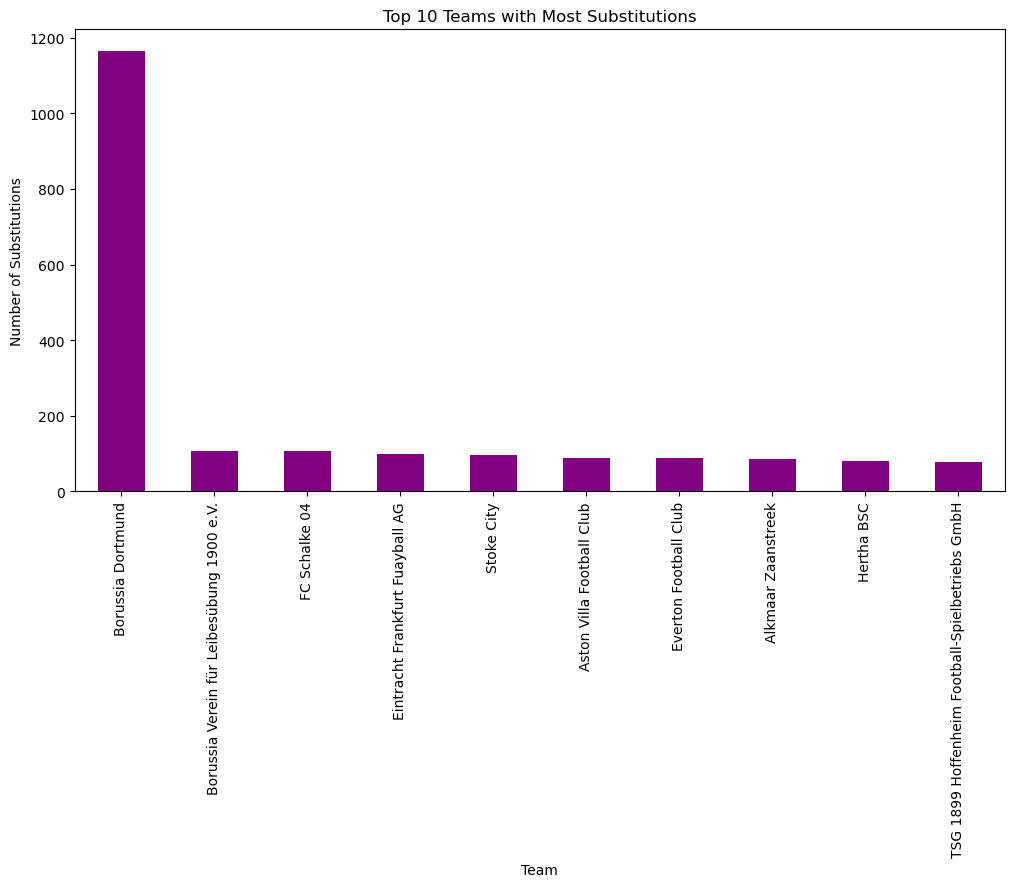

In [14]:
team_subs = df.groupby('home_club_name')['player_in_id'].count().sort_values(ascending=False).head(10)
team_subs.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Top 10 Teams with Most Substitutions')
plt.ylabel('Number of Substitutions')
plt.xlabel('Team')
plt.xticks(rotation=90)
plt.show()

#### Borussia Dortmund has the highest number of substitutions among the top 10 teams.
#### The next few teams, including Borussia Verein für Leibesübung 1900 e.V., FC Schalke 04, and Eintracht Frankfurt Fuayball AG, have a similar number of substitutions.
#### The remaining teams, such as Stoke City, Aston Villa Football Club, Everton Football Club, Alkmaar Zaanstreek, Hertha BSC, and TSG 1899 Hoffenheim Football-Spielbetriebs GmbH, have lower numbers of substitutions.

## Descriptive analysis: c) Event Analysis

### 1. Event frequency

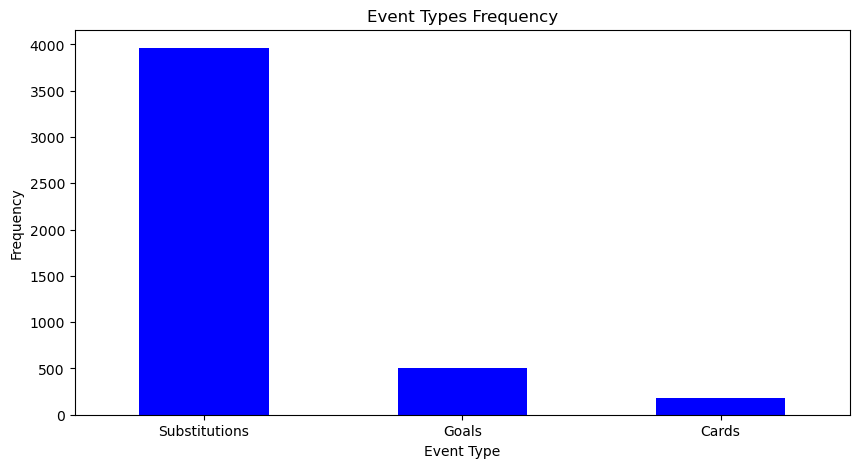

In [24]:
event_types = df['type_x'].value_counts()
event_types.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Event Types Frequency')
plt.ylabel('Frequency')
plt.xlabel('Event Type')
plt.xticks(rotation=0)
plt.show()

#### Substitutions have the highest frequency, with the bar reaching close to the 4000 mark on the y-axis.
#### Goals have a significantly lower frequency compared to substitutions, with the bar height around 500.
#### Cards have the lowest frequency among the three event types, with the bar height around 250.

### 2. Players involved in events

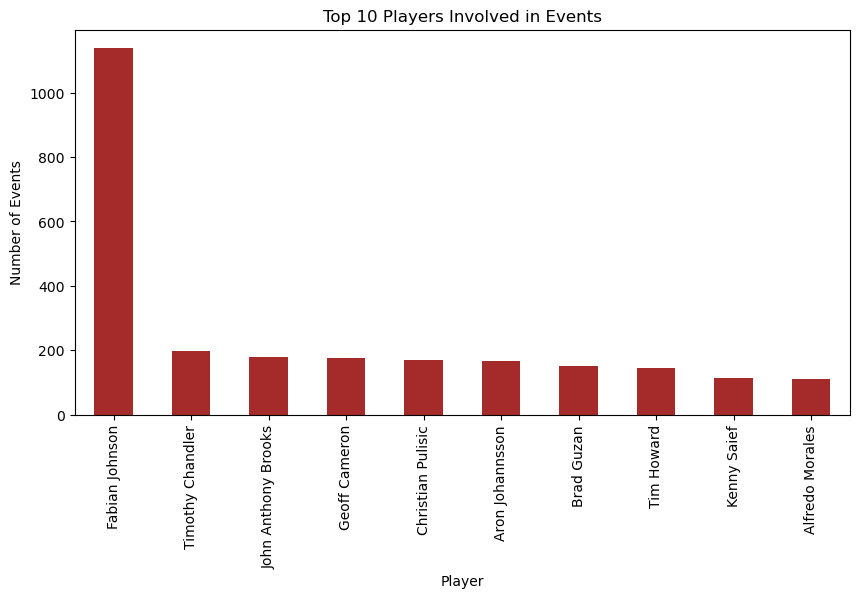

In [15]:
top_event_players = df['player_name_x'].value_counts().head(10)
top_event_players.plot(kind='bar', figsize=(10, 5), color='brown')
plt.title('Top 10 Players Involved in Events')
plt.ylabel('Number of Events')
plt.xlabel('Player')
plt.show()

#### Fabian Johnson has been involved in the most events, with a significantly higher number of events compared to the other players.
#### Timothy Chandler, John Anthony Brooks, and Geoff Cameron have been involved in the next highest number of events.
#### The remaining players, including Christian Pulisic, Aron Johannsson, Brad Guzan, Tim Howard, Kenny Saief, and Alfredo Morales, have been involved in fewer events.

### 3. Event patterns over time

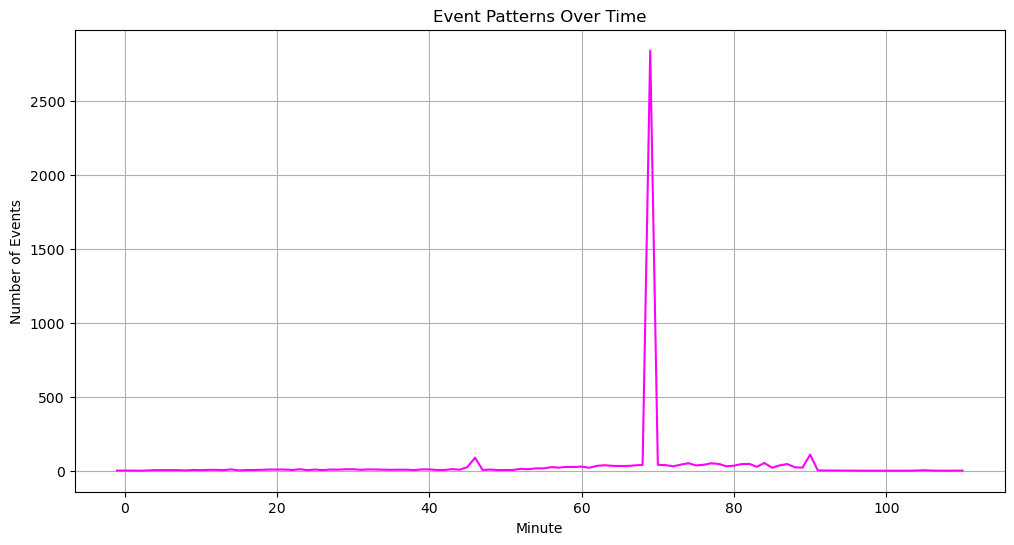

In [19]:
event_timing = df.groupby('minute')['type_x'].count()
event_timing.plot(kind='line', figsize=(12, 6), color='magenta')
plt.title('Event Patterns Over Time')
plt.ylabel('Number of Events')
plt.xlabel('Minute')
plt.grid()
plt.show()

#### Playing Time: Players who play more minutes are likely to be involved in more events, such as goals, assists, tackles, fouls, etc.
#### Position: Players in certain positions, such as defenders and midfielders, are often involved in more defensive actions and may have a higher number of events associated with them.
#### Playing Style: Players with more aggressive or active playing styles are likely to be involved in more events, such as tackles and fouls.